In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
import os
import joblib
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.preprocessing import StandardScaler

In [3]:
seed=42


In [4]:
def calculate_mz(values):
    median=np.median(values)
    mid_diff=np.abs(values-median)
    epsilon=1e-9
    mid_median=np.median(mid_diff)
    b_n=1.486
    sigma_mad=b_n*mid_median+epsilon
    z_scores=mid_diff/sigma_mad
    
    return z_scores

In [5]:
PATH='OUTPUT/MODIFIED_TYPE_3'
all_files=os.listdir(PATH)
files=[]
for f in all_files:
    if f.endswith('csv'):
        files.append(f)
all_files=files
anomaly_type=3

In [6]:
f1_scores = []
prec_scores=[]
recall_scores=[]
for fi in all_files:
    path = PATH+'/'+fi
    building = pd.read_csv(path)
    X_train= building['modified']
    y_train = building['labels'].values
    y_train=np.where(y_train != 0,1,0)
    scaler=StandardScaler()
    X_train=scaler.fit_transform(pd.DataFrame(X_train))
    ind_best_f1=0
    z_scores=calculate_mz(X_train)
    z_scores=z_scores.reshape(-1)
    for K in range(5,45,5):
        K/=10 #0.5,1,1.5,2,...
        low=-K
        high=K
        y_pred=np.zeros(len(y_train))
        bool_array= (z_scores>high) | (z_scores<low)
        bool_array=bool_array.reshape(-1)
        y_pred[bool_array]=1
        
        score_f1=f1_score(y_train,y_pred, zero_division=0)

        if score_f1> ind_best_f1:
            score_prec=precision_score(y_train,y_pred, zero_division=0)
            score_recall=recall_score(y_train,y_pred, zero_division=0)
            ind_best_f1=score_f1
            ind_best_prec=score_prec
            ind_best_recall=score_recall
    f1_scores.append(ind_best_f1)
    prec_scores.append(ind_best_prec)
    recall_scores.append(ind_best_recall)
    print(ind_best_f1,end="\t")

0.7762128325508608	0.8724832214765101	0.9297658862876254	0.9974895397489539	0.7482517482517482	0.12865835989568242	0.18854166666666666	0.2134599504541701	0.9718875502008032	0.9301972685887708	0.9954514128187456	0.36131386861313874	0.6790730965375326	0.9911660777385157	0.9986705663387396	0.7952810548230396	0.6561151079136691	0.9713896457765668	0.21069824418129846	0.9424184261036469	0.7603748326639892	0.8450258466082919	0.9857991221275497	0.9663503019844695	0.7364485981308411	0.8279668813247469	0.8114233907524931	0.9816564758198999	0.2285714285714286	0.9214659685863875	0.9933110367892977	0.8897558800579645	0	0.9740518962075847	0.8808311265023426	0.8184233835252436	0.9837352776219853	0.985735366453517	0.9875311720698254	0.021873942947344686	0.9725888324873095	0.7438640654499685	0.2612931798051373	0.9995684074233924	0.9504185447520928	0.16621662166216622	0.3016470588235294	0.9994040524433849	0.6896551724137931	0.9683060109289617	0.8321167883211679	0.9904175222450377	0.1579937304075235	0.36

In [7]:
print(np.mean(f1_scores))

0.7045875398761158


In [8]:
print(np.mean(prec_scores))

0.6769410599515356


In [9]:
print(np.mean(recall_scores))

0.8526430845329419


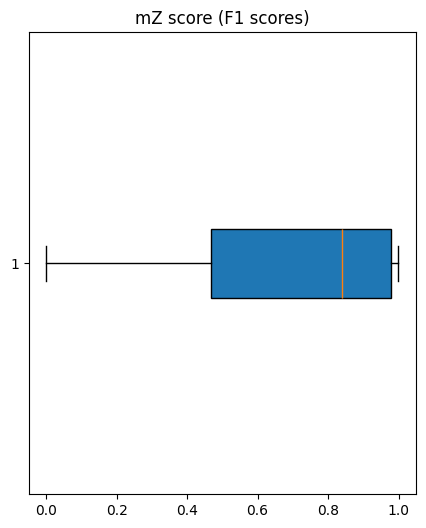

In [10]:
fig,ax=plt.subplots(figsize=(5,6))
ax.boxplot(f1_scores,patch_artist = True,
                notch =False, vert = 0)
ax.set_title("mZ score (F1 scores)")
fig.savefig(f"type_{anomaly_type}_mZ.png")

In [11]:
f1_score_dict={}
for idx,fi in enumerate(all_files):
    bid=int(fi.split("_")[0])
    f=f1_scores[idx]
    f1_score_dict[bid]=f

In [12]:
joblib.dump(f1_score_dict,f"OUTPUT/SCORES/mZ_type_{anomaly_type}_f1_scores.pkl")

['OUTPUT/SCORES/mZ_type_3_f1_scores.pkl']